In [2]:
%matplotlib inline


# Scatter

This example shows how to plot a scatter chart.


In [132]:
import numpy as np
from matplotlib.lines import Line2D
#import statsbomb as sb
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mplsoccer.pitch import Pitch, VerticalPitch

# Import libraries that we use
from pathlib import Path
import pandas as pd
import json
from tqdm import tqdm
#passes = event_df[(event_df['event'] == 'pass') & (event_df['half_time'] == 1)]


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import os



import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from highlight_text import ax_text
from mplsoccer import VerticalPitch, FontManager, Sbopen, add_image
from adjustText import adjust_text
from PIL import Image

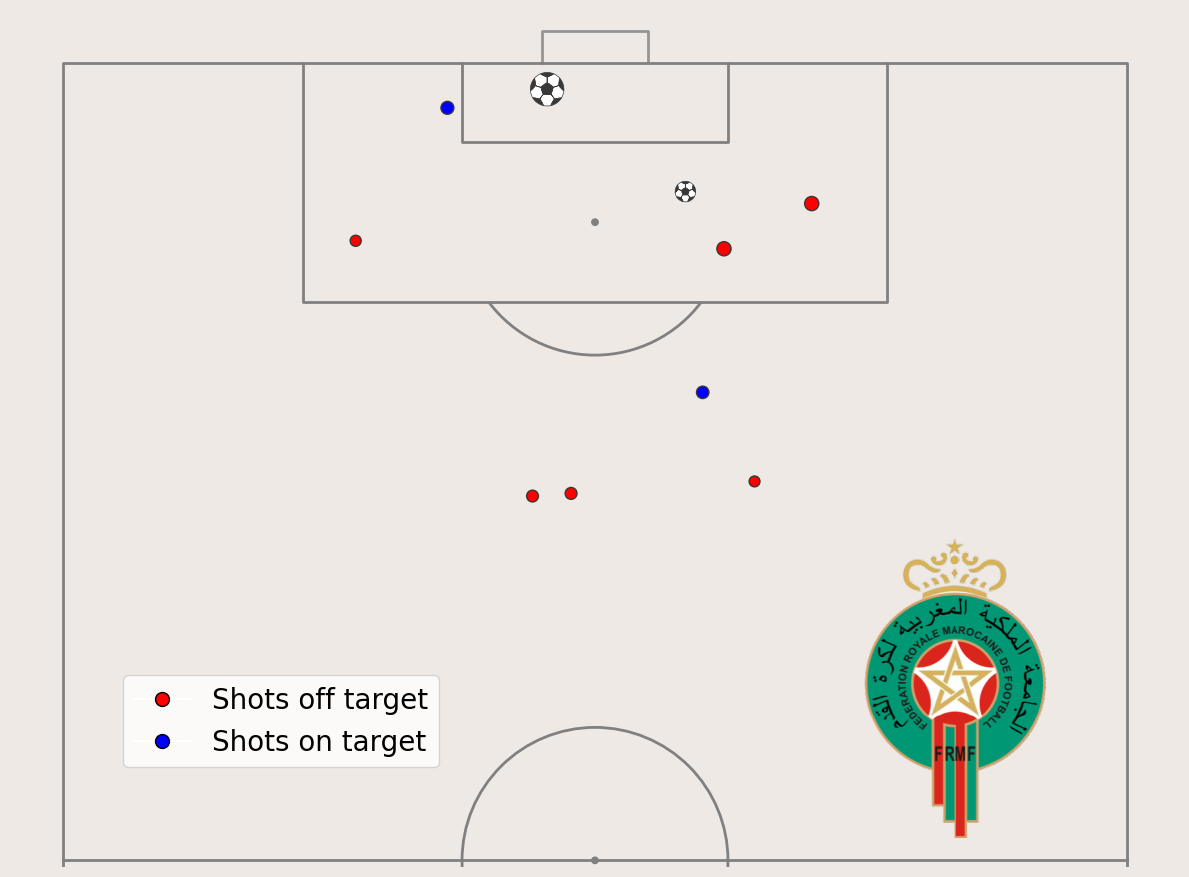

In [153]:
pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True, pitch_color='#EFE9E6', stripe=False, line_color='grey', # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency
fig, ax = pitch.draw(figsize=(12, 10))
# pitch = VerticalPitch(pad_top=10, pitch_color='#EFE9E6', line_color='grey', pitch_type='wyscout', half=True, line_zorder=2)             #VerticalPitch
# fig, ax = pitch.grid(figheight=8, ncols=2, endnote_height=0, endnote_space=0, axis = False, title_height=0, grid_height=0.84)

headercolor = 'purple'
rightfootcolor = '#2D719F'
leftfootcolor = 'green'


#import logos
#NED_logo = Image.open('wappen/belgien.png')
SEN_logo = Image.open('wappen/morocco.png')
#add and place logos
# logo1_ax = fig.add_axes([-.03, 0.1, 0.3, 0.3], zorder=1)
# logo1_ax.imshow(NED_logo)
# logo1_ax.axis("off")

logo2_ax = fig.add_axes([0.65, 0.1, 0.3, 0.3], zorder=1)
logo2_ax.imshow(SEN_logo)
logo2_ax.axis("off")
#uncomment up to here if you do not wish to include logos in your graph
#------------------------------------------------------------------------------
#set background color of the plot
fig.patch.set_facecolor('#EFE9E6')
markersize= 1000


sc_goals = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                   # size varies between 100 and 1000 (points squared)
                   #s=(df_goals_barca.shot_statsbomb_xg * 800) + 100
                   s= markersize* df_goals_barca.shot_statsbomb_xg +50,
                   c='white',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='football',
                   ax=ax)

sc2 = pitch.scatter(shots_off_Target.x, shots_off_Target.y,
                   # size varies between 100 and 1000 (points squared)
                   s=shots_off_Target.shot_statsbomb_xg * markersize +50,
                   c='r',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='o',
                   ax=ax)

sc3 = pitch.scatter(shots_on_Target.x, shots_on_Target.y,
                   # size varies between 100 and 1000 (points squared)
                   s=shots_on_Target.shot_statsbomb_xg * markersize +50,
                   c='blue',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='o',
                   ax=ax)
# create a legend for the plot
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Shots off target',
           markerfacecolor='r', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Shots on target',
           markerfacecolor='b', markersize=10, markeredgecolor='k'),
       
#     Line2D([0], [0], marker='o', color='w', label='Goals',
#            markerfacecolor='w', markeredgecolor='k', markersize=10),
]

# add the legend to the plot
ax.legend(handles=legend_elements, loc='lower left', fontsize=20 ,bbox_to_anchor=(0.085,0.1))

plt.savefig('morocco_shotmap.png')



In [137]:

import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker, Sbopen)

# get data for a Sevilla versus Barcelona match with a high amount of shots
parser = Sbopen()
df, related, freeze, tactics = parser.event(3857283)

# subset the barcelona shots
df_shots_barca = df[(df.type_name == 'Shot') & (df.team_name == 'Belgium')].copy()
# subset the barca open play passes
df_pass_barca = df[(df.type_name == 'Pass') &
                   (df.team_name == 'Belgium') &
                   (~df.sub_type_name.isin(['Throw-in', 'Corner', 'Free Kick', 'Kick Off']))].copy()

# filter goals / non-shot goals
df_goals_barca = df_shots_barca[df_shots_barca.outcome_name == 'Goal'].copy()
df_non_goal_shots_barca = df_shots_barca[df_shots_barca.outcome_name != 'Goal'].copy()
nG=df_non_goal_shots_barca
shots_off_Target = nG[(nG.outcome_name== 'Blocked') |(nG.outcome_name=='Off T') | (nG.outcome_name=='Post') | (nG.outcome_name== 'Wayward') | (nG.outcome_name=='Saved Off T')]
shots_on_Target = nG[(nG.outcome_name=='Saved')|(nG.outcome_name=='Saved To Post')]

# setup a mplsoccer FontManager to download google fonts (SigmarOne-Regular)
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')



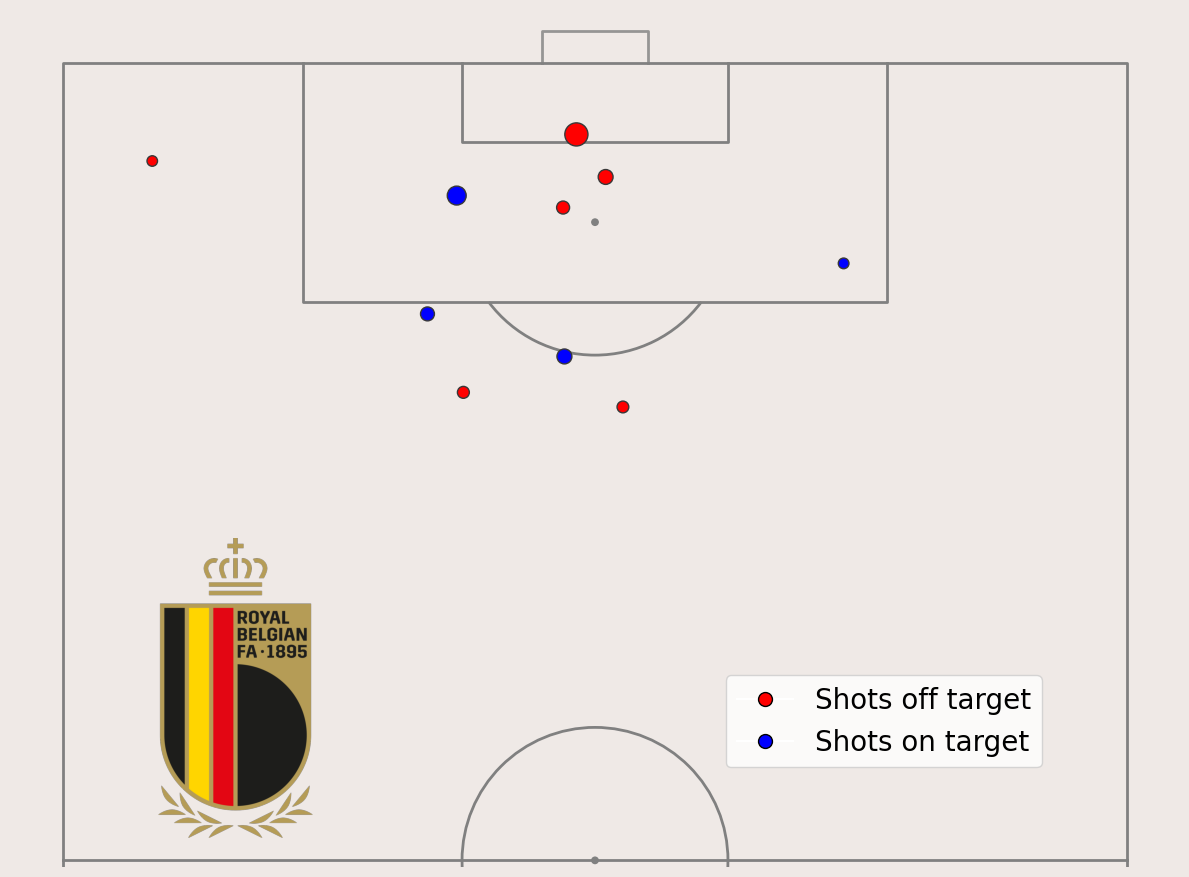

In [151]:
pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True, pitch_color='#EFE9E6', stripe=False, line_color='grey', # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency
fig, ax = pitch.draw(figsize=(12, 10))
# pitch = VerticalPitch(pad_top=10, pitch_color='#EFE9E6', line_color='grey', pitch_type='wyscout', half=True, line_zorder=2)             #VerticalPitch
# fig, ax = pitch.grid(figheight=8, ncols=2, endnote_height=0, endnote_space=0, axis = False, title_height=0, grid_height=0.84)

headercolor = 'purple'
rightfootcolor = '#2D719F'
leftfootcolor = 'green'


#import logos
NED_logo = Image.open('wappen/belgien.png')
#SEN_logo = Image.open('wappen/morocco.png')
#add and place logos
logo1_ax = fig.add_axes([0.05, 0.1, 0.3, 0.3], zorder=1)
logo1_ax.imshow(NED_logo)
logo1_ax.axis("off")

# logo2_ax = fig.add_axes([0.65, 0.1, 0.3, 0.3], zorder=1)
# logo2_ax.imshow(SEN_logo)
# logo2_ax.axis("off")
#uncomment up to here if you do not wish to include logos in your graph
#------------------------------------------------------------------------------
#set background color of the plot
fig.patch.set_facecolor('#EFE9E6')
markersize= 1000


sc_goals = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                   # size varies between 100 and 1000 (points squared)
                   #s=(df_goals_barca.shot_statsbomb_xg * 800) + 100
                   s= markersize* df_goals_barca.shot_statsbomb_xg +50,
                   c='white',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='football',
                   ax=ax)

sc2 = pitch.scatter(shots_off_Target.x, shots_off_Target.y,
                   # size varies between 100 and 1000 (points squared)
                   s=shots_off_Target.shot_statsbomb_xg * markersize +50,
                   c='r',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='o',
                   ax=ax)

sc3 = pitch.scatter(shots_on_Target.x, shots_on_Target.y,
                   # size varies between 100 and 1000 (points squared)
                   s=shots_on_Target.shot_statsbomb_xg * markersize +50,
                   c='blue',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='o',
                   ax=ax)
# create a legend for the plot
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Shots off target',
           markerfacecolor='r', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Shots on target',
           markerfacecolor='b', markersize=10, markeredgecolor='k'),
       
#     Line2D([0], [0], marker='o', color='w', label='Goals',
#            markerfacecolor='w', markeredgecolor='k', markersize=10),
]

# add the legend to the plot
ax.legend(handles=legend_elements, fontsize=20 ,bbox_to_anchor=(0.6,0.1))

plt.savefig('belgium_shotmap.png')

